# Part 2 - Parallelizing Tau Histogram Makers

By "Dean Cianciolo"

![plotSample](plot.png)

---
# Abstract

&#9989; This project attempts to speed up a tau matching and plotting software using openMP. In my research, I need to analyze the properties of simulated taus so we can build firmware that will detect real taus in the ATLAS detector. To do this, I need to match simulated "truth" taus to the ones we would hypothetically "reconstruct", or see in our detector. This matching algorithm takes time, and these properties can be plotted, each of which needs to be sped up. We parallize the matching and plotting algorithms via parallelizing the event loop. We do not notice a speed up in matching times due to low matching time when the number of events is relatively small (~20 GB file). We notice a speed up in plotting, but only when the number of CPUs reaches nine and above.


---
# Methodology

&#9989;  
```
1. Retrieve scripts from MSU-ATLAS tier3, along with a small datafile (for code testing) and large datafile (for testing runtimes)
2. Get runtimes for full serial code
3. Parallelize matching algorithm
4. Upon noticing matching algorithm has an extremely fast runtime, also parallelize plotting algorithm
5. Run on ncpus = 1 through 10 and record runtimes.

Directions for recreation are in the README.
```

---
# Timing Results
All timing was done on the dev-amd24-h200 development node on the HPCC. The reconstructed tau matching algorithm did not change runtimes before and after parallelization, staying at 0.02 min. I suspect this lack of change is due to the fact the timing is already extremely low. On the other hand, the plotting algorithm showed significant speedup, but the trend was strange. It is presented in the plot below:


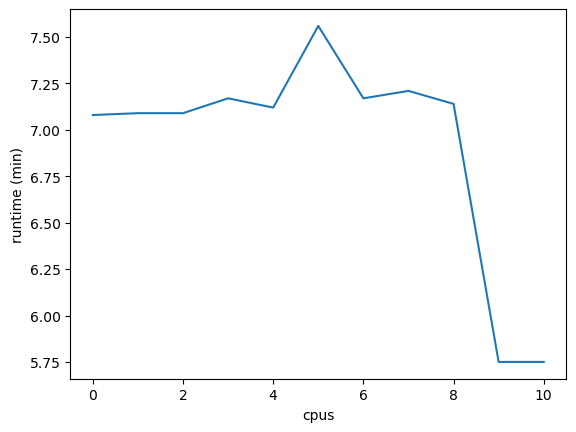

In [14]:
import matplotlib.pyplot as plt

x = [0,1,2,3,4,5,6,7,8,9,10]
y = [7.08, 7.09, 7.09, 7.17, 7.12, 7.56, 7.17, 7.21, 7.14, 5.75, 5.75]

plt.plot(x,y)
plt.xlabel("cpus")
plt.ylabel("runtime (min)")
plt.show()

We can see that until nine cpus are used, there is only slowdown due to setting up the parallel framework. It is unexpected that there is a significant speedup, but only after at least nine cores are used. I initially ran cpus 11-20 in a submission script with a bash for loop, and seeing this result, deciding to run them manually to test if the strange result was because of something wrong in the submission script; it wasn't, and cpus 11-20 all exhibit similar runtimes to cores 9 and 10.

---
# Concluding Discussion and Future Work

I successfully sped up the plotting time of my research algorithm. I was unable to notice speedup in the matchup algorithm, because significant runtimes for that algorithm can only be acquired when the data file is larger than the hpcc can store. The speedup in the plotting algorithm was only noticable starting at a number of cpus at nine or above, which is very strange, but the results aligned on all types of parallelizing, so it seems to have worked. In this frameowrk, there are guaranteed to be other event loops that can be parallelized, for even faster timing.

-----
### Congratulations, you are done!

Now, you just need to create a second directory in your git repository and include your report as an md or ipynb file in the directory along with any additional figures and files needed to reproduce the results.  You instructor should already have your git repository and be able to pull in your changes. 

Written by Dr. Dirk Colbry, Michigan State University (Updated by Dr. Nathan Haut in Spring 2025)
<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

----